### Преверка окружения и пакетов

In [32]:
# import sys
# sys.executable

In [33]:
# !pip list

### Основная часть

In [6]:
import sys
import os

# Добавляем корневую папку проекта в sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from src.processing.text_preprocessor import TextPreprocessor

✅ punkt найден!
✅ stopwords найден!


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [36]:
import os
os.getcwd() 

'D:\\pythonProject\\fine_tuning_project\\notebooks'

In [37]:
# Загружаем датасет
df = pd.read_json("../data/processed/dataset.json")

In [38]:
# Общая информация о данных
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  32 non-null     object
 1   text      32 non-null     object
dtypes: object(2)
memory usage: 644.0+ bytes
None
   category                                               text
0  delirium  особенно ярко эта склонность к\nсимволизму про...
1  delirium  прослушайте беседу с больным 33 лет\nбольной к...
2  delirium  больной которого вы видите наблюдается&nbsp;\n...
3  delirium  больной п1 года которого вы видите на\nэкране ...
4  delirium  ну сколько лет\nпредставляем вам больного 31 г...


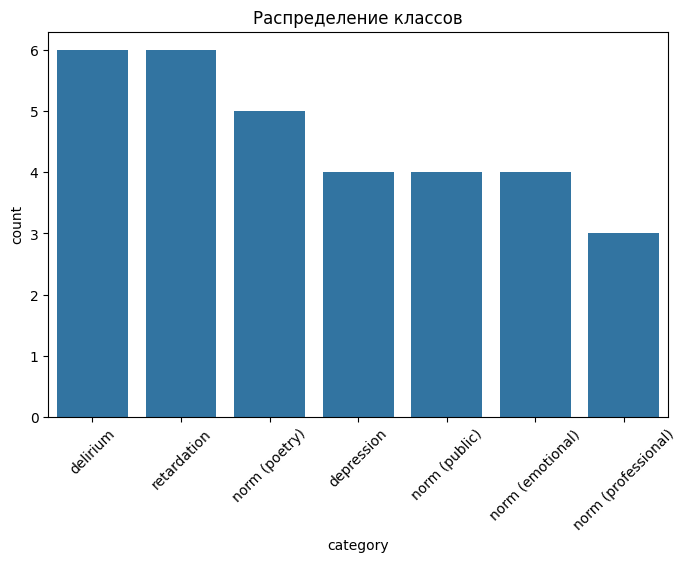

In [39]:
# Распределение классов
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="category", order=df["category"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Распределение классов")
plt.show()

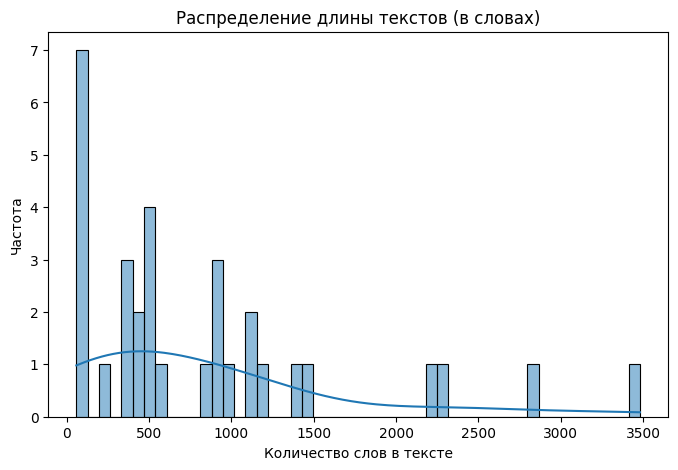

In [60]:
def plot_text_length_distribution(df: pd.DataFrame, text_column: str = "text"):
    """
    Строит гистограмму распределения длины текстов в словах.

    :param df: DataFrame с текстовыми данными.
    :param text_column: Название колонки с текстами (по умолчанию "text").
    """
    if text_column not in df.columns:
        raise ValueError(f"Колонка '{text_column}' не найдена в DataFrame")
    
    # Считаем количество слов в каждом тексте
    df["word_count"] = df[text_column].apply(lambda x: len(str(x).split()))  

    # Строим гистограмму
    plt.figure(figsize=(8, 5))
    sns.histplot(df["word_count"], bins=50, kde=True)

    plt.title("Распределение длины текстов (в словах)")
    plt.xlabel("Количество слов в тексте")
    plt.ylabel("Частота")
    plt.show()

plot_text_length_distribution(df)

In [41]:
# Применение препроцессинга
preprocessor = TextPreprocessor()
df["processed_text"] = df["text"].apply(preprocessor.preprocess)

In [42]:
# Частотность слов
all_words = [word for text in df["processed_text"] for word in text]
word_freq = pd.Series(all_words).value_counts()

In [43]:
# Топ-20 слов
print("Топ-20 самых частых слов:")
print(word_freq.head(20))

Топ-20 самых частых слов:
это        467
очень       89
врач        72
могу        69
почему      61
пациент     58
нужно       55
музыка      54
значит      52
просто      50
всё         44
такое       41
которые     40
человек     39
вами        39
знаю        39
понятно     38
время       38
дома        36
чтото       36
Name: count, dtype: int64


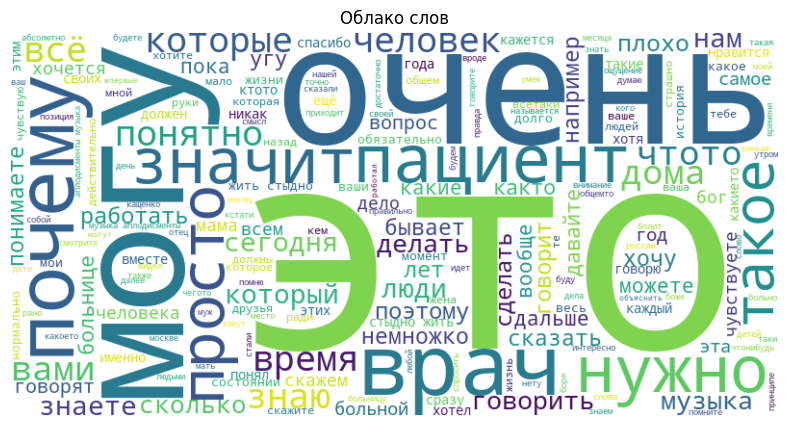

In [44]:
# Облако слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Облако слов")
plt.show()

### Разбиение текста на части в зависимости от длинны (опционально)

In [54]:
import pandas as pd

# Загружаем датасет
df = pd.read_json("../data/processed/dataset.json")

# Функция для разбиения текста по 2 000 слов с сохранением категории
def split_text(row, max_words=2000):
    words = row["text"].split()
    chunks = [words[i:i + max_words] for i in range(0, len(words), max_words)]
    return [{"category": row["category"], "text": " ".join(chunk)} for chunk in chunks]

# Разбиваем данные
new_data = []
for _, row in df.iterrows():
    new_data.extend(split_text(row))

# Создаем новый DataFrame
df_cleaned = pd.DataFrame(new_data)

# Сохраняем новый датасет
df_cleaned.to_json("../data/processed/dataset_cleaned.json", orient="records", force_ascii=False, indent=4)

# Выводим статистику
print(f"✅ Датасет успешно разбит! Было записей: {len(df)}, стало: {len(df_cleaned)}")
df_cleaned.head(10)


✅ Датасет успешно разбит! Было записей: 32, стало: 36


,category,text
0,delirium,особенно ярко эта склонность к символизму проя...
1,delirium,прослушайте беседу с больным 33 лет больной ко...
2,delirium,морально этические вопросы потрясен и но это н...
3,delirium,больной которого вы видите наблюдается&nbsp; п...
4,delirium,больной п1 года которого вы видите на экране д...
5,delirium,Они ушли Потом целые сутки Вы опять с Нели име...
6,delirium,ну сколько лет представляем вам больного 31 го...
7,delirium,больная 37 лет поступает в клинику в третий&nb...
8,retardation,прослушайте беседу с больным 33 лет записанную...
9,retardation,у нас есть возможность еще раз продемонстриров...


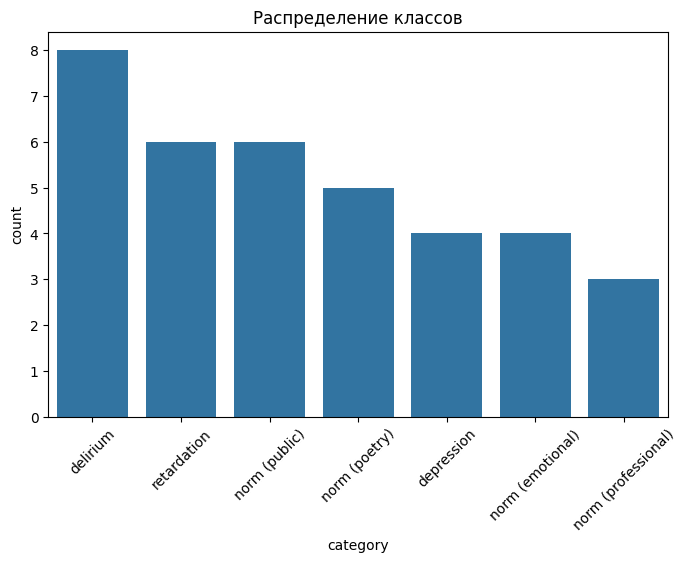

In [55]:
# Распределение классов
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x="category", order=df_cleaned["category"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Распределение классов")
plt.show()

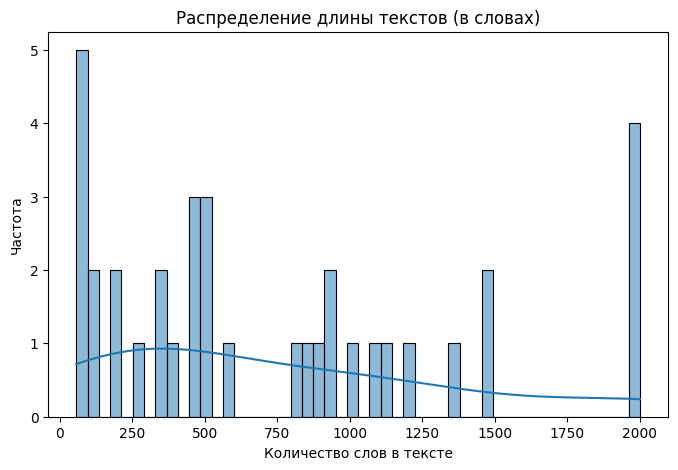

In [59]:
# Пример использования:
plot_text_length_distribution(df_cleaned)

### Train/test/val

In [4]:
from sklearn.model_selection import train_test_split

In [14]:
# Загружаем датасет
df = pd.read_json("../data/processed/dataset_cleaned.json")

In [16]:
df['category'].value_counts()

category
delirium               8
retardation            6
norm (public)          6
norm (poetry)          5
depression             4
norm (emotional)       4
norm (professional)    3
Name: count, dtype: int64

In [20]:
# !!! НЕ ЗАБЫТЬ stratify=df["category"] !!!

# Разделяем данные на train (70%) и temp (30%)
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df["category"], random_state=42)

# Разделяем temp на validation (15%) и test (15%)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=df["category"], random_state=42)

# Проверяем размерность
print(f"Train: {len(train_df)}, Validation: {len(val_df)}, Test: {len(test_df)}")

Train: 25, Validation: 5, Test: 6


In [22]:
# Сохраняем
train_df.to_json("../data/processed/train.json", orient="records", force_ascii=False, indent=4)
val_df.to_json("../data/processed/val.json", orient="records", force_ascii=False, indent=4)
test_df.to_json("../data/processed/test.json", orient="records", force_ascii=False, indent=4)

print("✅ Датасет успешно разделен и сохранен!")

✅ Датасет успешно разделен и сохранен!
